In [1]:
import pandas as pd
import numpy as np

In [2]:
# Charger les données depuis data/raw/
df = pd.read_csv('../data/raw/crop_yield.csv')

In [3]:
# Afficher les 5 premières lignes
print(df.head())
# Afficher les informations générales
print(df.info())
# Statistiques descriptives
print(df.describe())

  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  
4                7.24825

In [4]:
# Compter les valeurs manquantes par colonne
print(df.isnull().sum())

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


In [5]:
# Vérifier les types de chaque colonne
print(df.dtypes)

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Charger les données prétraitées
df = pd.read_csv('../data/processed/cleaned_data.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,3,4,1,897.077239,27.676966,0,1,0,122,6.555816
1,2,1,3,992.673282,18.026142,1,1,1,140,8.527341
2,1,2,0,147.998025,29.794042,0,0,2,106,1.127443
3,1,4,4,986.866331,16.644190,0,1,1,146,6.517573
4,2,5,5,730.379174,31.620687,1,1,0,110,7.248251


In [17]:
# Statistiques de base
print(df.describe())

              Region      Soil_Type           Crop    Rainfall_mm  \
count  999769.000000  999769.000000  999769.000000  999769.000000   
mean        1.500503       2.500648       2.499417     550.077823   
std         1.117830       1.708101       1.707790     259.804329   
min         0.000000       0.000000       0.000000     100.000896   
25%         1.000000       1.000000       1.000000     325.062906   
50%         2.000000       3.000000       2.000000     550.229205   
75%         3.000000       4.000000       4.000000     774.797949   
max         3.000000       5.000000       5.000000     999.998098   

       Temperature_Celsius  Fertilizer_Used  Irrigation_Used  \
count        999769.000000    999769.000000    999769.000000   
mean             27.506079         0.500056         0.499606   
std               7.220488         0.500000         0.500000   
min              15.000034         0.000000         0.000000   
25%              21.256078         0.000000         0.0000

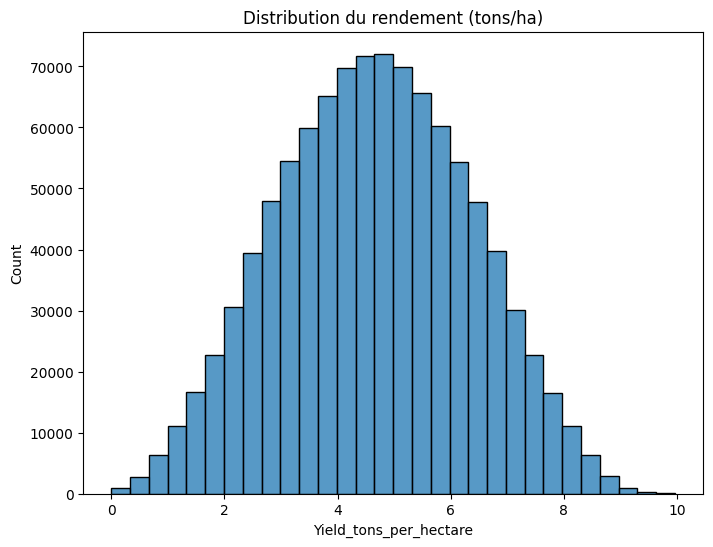

In [18]:
# Distribution de Yield_tons_per_hectare
plt.figure(figsize=(8, 6))
sns.histplot(df['Yield_tons_per_hectare'], bins=30)
plt.title('Distribution du rendement (tons/ha)')
plt.show()

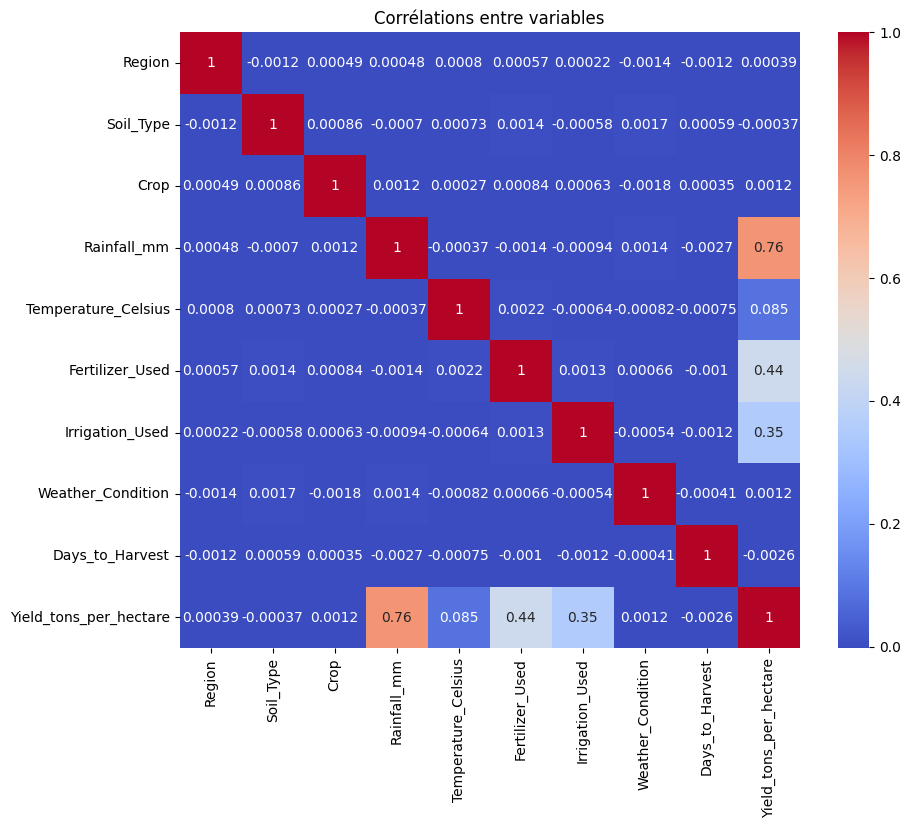

In [19]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Corrélations entre variables')
plt.show()

In [20]:
# Compter les valeurs négatives
negative_yields = df[df['Yield_tons_per_hectare'] < 0]
print(f"Nombre de valeurs négatives : {len(negative_yields)}")
print(negative_yields[['Yield_tons_per_hectare']].head(10))  # Afficher les 10 premières

Nombre de valeurs négatives : 0
Empty DataFrame
Columns: [Yield_tons_per_hectare]
Index: []


In [21]:
# Confirmer qu’il n’y a plus de valeurs négatives
print(f"Nombre de valeurs négatives dans Yield_tons_per_hectare : {len(df[df['Yield_tons_per_hectare'] < 0])}")

Nombre de valeurs négatives dans Yield_tons_per_hectare : 0


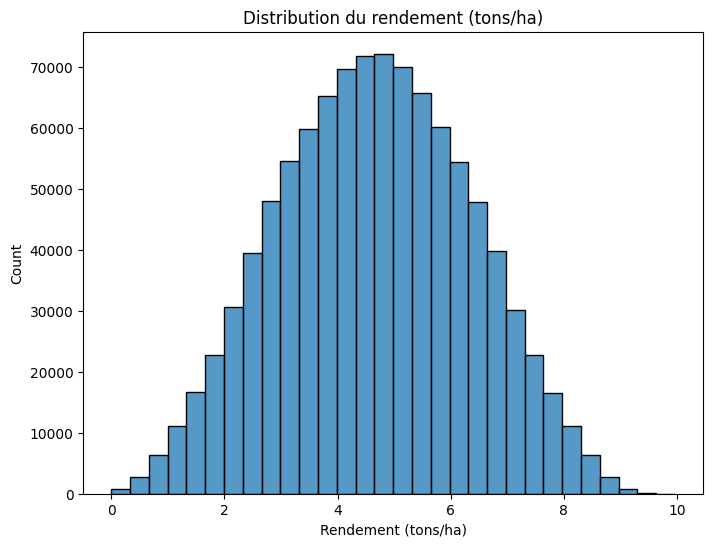

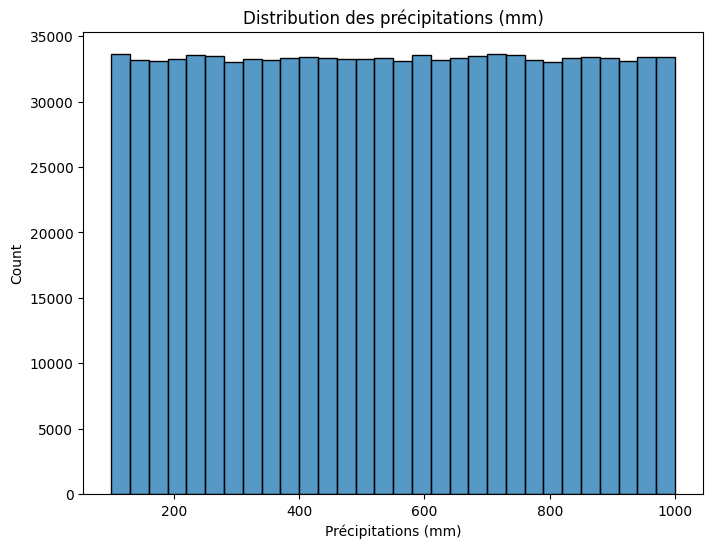

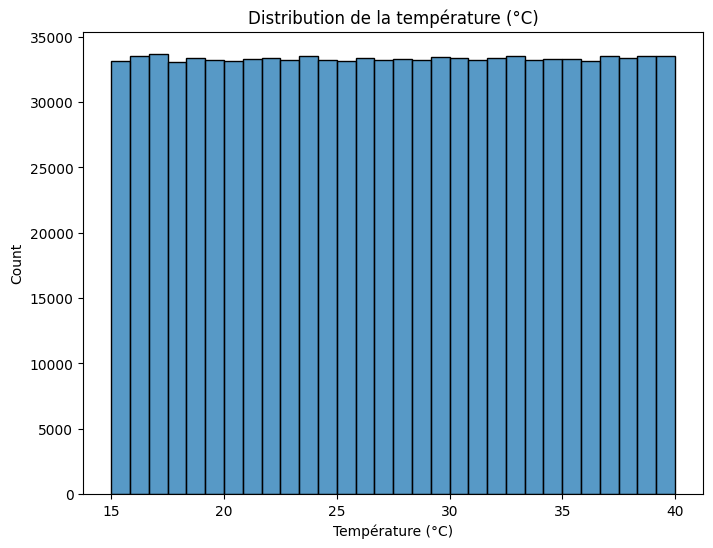

In [22]:
# Visualiser la distribution de Yield_tons_per_hectare
plt.figure(figsize=(8, 6))
sns.histplot(df['Yield_tons_per_hectare'], bins=30)
plt.title('Distribution du rendement (tons/ha)')
plt.xlabel('Rendement (tons/ha)')
plt.show()

# Visualiser Rainfall_mm
plt.figure(figsize=(8, 6))
sns.histplot(df['Rainfall_mm'], bins=30)
plt.title('Distribution des précipitations (mm)')
plt.xlabel('Précipitations (mm)')
plt.show()

# Visualiser Temperature_Celsius
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature_Celsius'], bins=30)
plt.title('Distribution de la température (°C)')
plt.xlabel('Température (°C)')
plt.show()

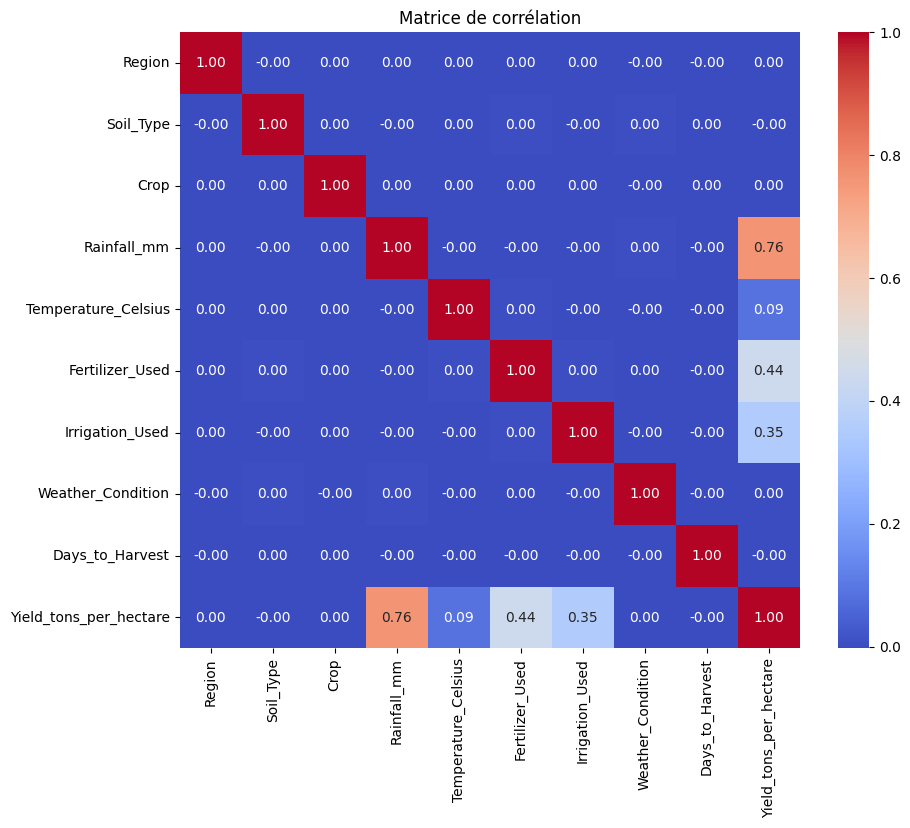

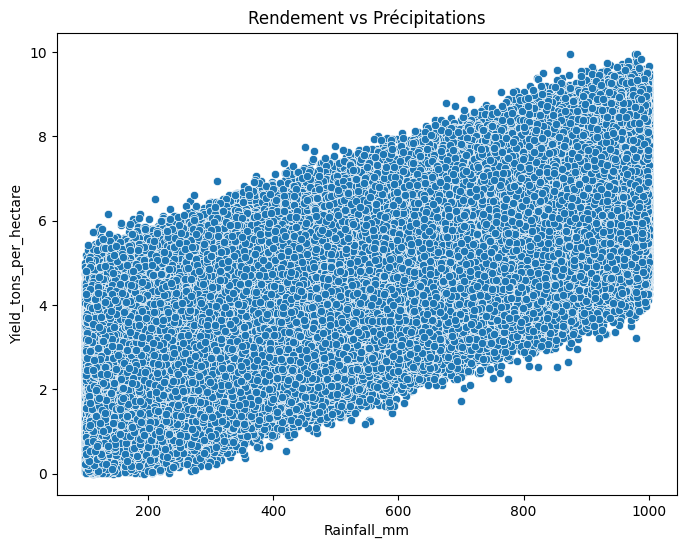

In [23]:
# Corrélation entre variables numériques
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

# Relation entre Rainfall_mm et Yield_tons_per_hectare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=df)
plt.title('Rendement vs Précipitations')
plt.show()

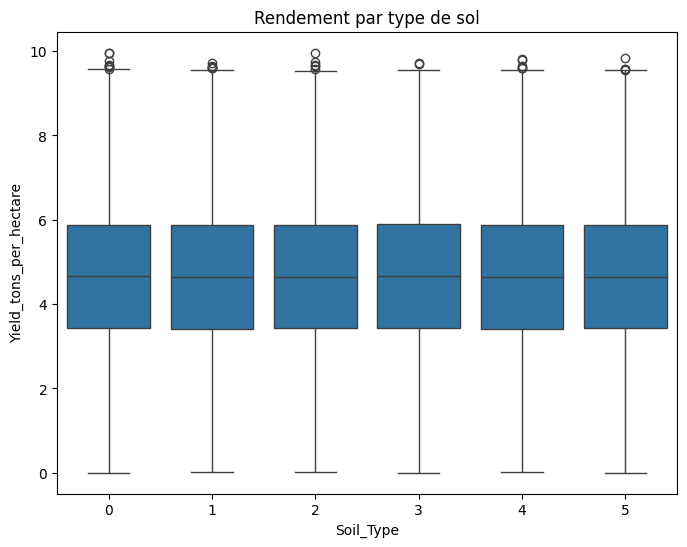

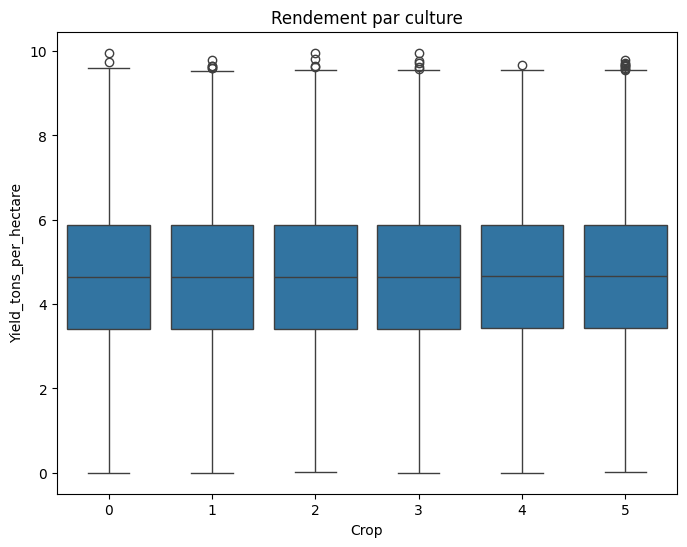

In [24]:
# Rendement moyen par type de sol
plt.figure(figsize=(8, 6))
sns.boxplot(x='Soil_Type', y='Yield_tons_per_hectare', data=df)
plt.title('Rendement par type de sol')
plt.show()

# Rendement moyen par culture
plt.figure(figsize=(8, 6))
sns.boxplot(x='Crop', y='Yield_tons_per_hectare', data=df)
plt.title('Rendement par culture')
plt.show()